# 1. Defining the Question

Hypothyroidism (underactive thyroid) is a condition in which your thyroid gland doesn't produce enough of certain crucial hormones.

Hypothyroidism may not cause noticeable symptoms in the early stages.

Over time, untreated hypothyroidism can cause a number of health problems, such as obesity, joint pain, infertility and heart disease.

Hence the need for early detection.

Hypothyroidism may be due to a number of factors.

Risk factors
Although anyone can develop hypothyroidism, you're at an increased risk if you:

- Are a woman

- Are older than 60

- Have a family history of thyroid disease

- Have an autoimmune disease, such as type 1 diabetes or celiac disease

- have been treated with radioactive iodine or anti-thyroid medications

- Received radiation to your neck or upper chest

- Have had thyroid surgery (partial thyroidectomy)

- Have been pregnant or delivered a baby within the past six months

## a) Specifying the Question

We aim to build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

## b) Defining the Metric for Success


An accuracy score greater than 90%

An F1 score also greater than 80%

## c) Understanding the Context

Nairobi Hospital conducted a clinical camp to test for hypothyroidism.

The data collected focused on Thyroid patients.

## d) Recording the Experimental Design

1. Performing EDA
2. Feature Engineering
3. Multiple Linear Regression
4. Quantile regression
5. Ridge Regression
6. Lasso Regression
7. Elastic-Net Regression
8. Computing the RMSE
9. Plotting residual plots
10. Assess their heteroscedasticity using Barlette's test
11. Challenging the solution
12. Conclusion

# Importing necessary Libraries

In [0]:
#Load the necessary python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#import the necessary scikit learn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Reading the Data

In [130]:
# reading our data
data = pd.read_csv('hypothyroid.csv')
data

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?


# Checking the Data

In [131]:
# Previewing the top of our data
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [132]:
# Previewing the bottom of our data
data.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [133]:
# checking whether each column has appropriate data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
status                       3163 non-null object
age                          3163 non-null object
sex                          3163 non-null object
on_thyroxine                 3163 non-null object
query_on_thyroxine           3163 non-null object
on_antithyroid_medication    3163 non-null object
thyroid_surgery              3163 non-null object
query_hypothyroid            3163 non-null object
query_hyperthyroid           3163 non-null object
pregnant                     3163 non-null object
sick                         3163 non-null object
tumor                        3163 non-null object
lithium                      3163 non-null object
goitre                       3163 non-null object
TSH_measured                 3163 non-null object
TSH                          3163 non-null object
T3_measured                  3163 non-null object
T3                           3163 non-null 

> The data types for both the numerical and categorical values are listed as 'object'. We need to convert the numerical column data type to 'float64'. The categorical column data types are also to be converted to 'categorical' data type.

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
status                       3163 non-null object
age                          3163 non-null object
sex                          3163 non-null object
on_thyroxine                 3163 non-null object
query_on_thyroxine           3163 non-null object
on_antithyroid_medication    3163 non-null object
thyroid_surgery              3163 non-null object
query_hypothyroid            3163 non-null object
query_hyperthyroid           3163 non-null object
pregnant                     3163 non-null object
sick                         3163 non-null object
tumor                        3163 non-null object
lithium                      3163 non-null object
goitre                       3163 non-null object
TSH_measured                 3163 non-null object
TSH                          3163 non-null object
T3_measured                  3163 non-null object
T3                           3163 non-null 

# Data Cleaning

In [135]:
data.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

We see that there are no null values but we had seen the special character ? in some columns.

Hence we need to change that by replacing the ? with null values then impute them.

In [136]:
df = data.replace(['?'], np.nan)
df.isnull().sum().sum()

5329

In [0]:
# Creating a list of the numerical columns in the dataset.
numeric = ['age', 'FTI', 'T3', 'T4U', 'TSH', 'TT4','TBG']

for x in df.columns:
   if x in numeric:
       df[x]=pd.to_numeric(df[x])
   else:
        df[x]=df[x].astype('category')

In [138]:
df.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
TBG                           float64
dtype: objec

In [139]:
#check for null values
df.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

Finding outliers will guide us on the best way to deal with the null values. (Fill with mean, mode, median or back-fill or forward-fill)



In [140]:
#Are there outliers in the age dataset?

Q1 = df.age.quantile(0.25)
Q3 = df.age.quantile(0.75)

IQR = Q3 - Q1

age_outliers = ((df.age < Q1 - 1.5 * IQR) | (df.age > Q3 + 1.5 * IQR))
age_outliers.value_counts()

False    3163
Name: age, dtype: int64

This means that there's no record of outliers, the best preferred method to deal with the missing values in the case of the age column is to fill using the mean

In [141]:
#Finding mean of the age column

df.age.mean()

51.154214206845786

In [0]:
#Filling the missing value entries with mean

df.age = df.age.fillna(df.age.mean())

In [143]:
# checking for duplicated values
df.duplicated().sum()

77

In [0]:
# dropping duplicated columns
df.drop_duplicates(keep=False,inplace=True)

In [145]:
df.duplicated().sum()

0

In [146]:
#Check for the unique values in every column

for x in df.columns :
  print('\n')                    
  print(data[x].nunique())    
  print(data[x].unique())



2
['hypothyroid' 'negative']


93
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']


3
['M' 'F' '?']


2
['f' 't']


2
['f' 't']


2
['f' 't']


2
['f' 't']


2
['f' 't']


2
['f' 't']


2
['f' 't']


2
['f' 't']


2
['f' 't']


2
['f' 't']


2
['f' 't']


2
['y' 'n']


240
['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34' '53' '9.40'
 '126' '10' '530' '35' '65' '57' '125' '23' '80' '117' '49' '66' '8.20'
 '150' '?' '18' '165' '164' '24' '90' '77' '19' '58' '100' '213' '17'
 '235' '153' '13' '3

In [147]:
#Fill a null value using fillna()  

df.sex = df.sex.replace(to_replace = np.nan, value = 'unknown')  

#Confirm the changes

df.sex.value_counts()

F          2057
M           880
unknown      73
Name: sex, dtype: int64

In [148]:
#check for null values
df.isnull().sum()

status                          0
age                             0
sex                             0
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           443
T3_measured                     0
T3                            666
TT4_measured                    0
TT4                           232
T4U_measured                    0
T4U                           231
FTI_measured                    0
FTI                           230
TBG_measured                    0
TBG                          2767
dtype: int64

In [0]:
#Fill the missing value entries with the median

df.TSH = df.TSH.fillna(df.TSH.median())

df.T3 = df.T3.fillna(df.T3.median())

df.TT4 = df.TT4.fillna(df.TT4.median())

df.FTI = df.FTI.fillna(df.FTI.median())

df.T4U = df.T4U.fillna(df.T4U.median())

df.TBG = df.TBG.fillna(df.TBG.median())

Therefore, how to deal with missing values

Using the median strikes me as the best option since it is essentail to assign the patients a hormone level that's within normal range.

So replace with the median value in each category.

In [150]:
df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [0]:
measured = ['TSH','T3','TT4','T4U','FTI','TBG']

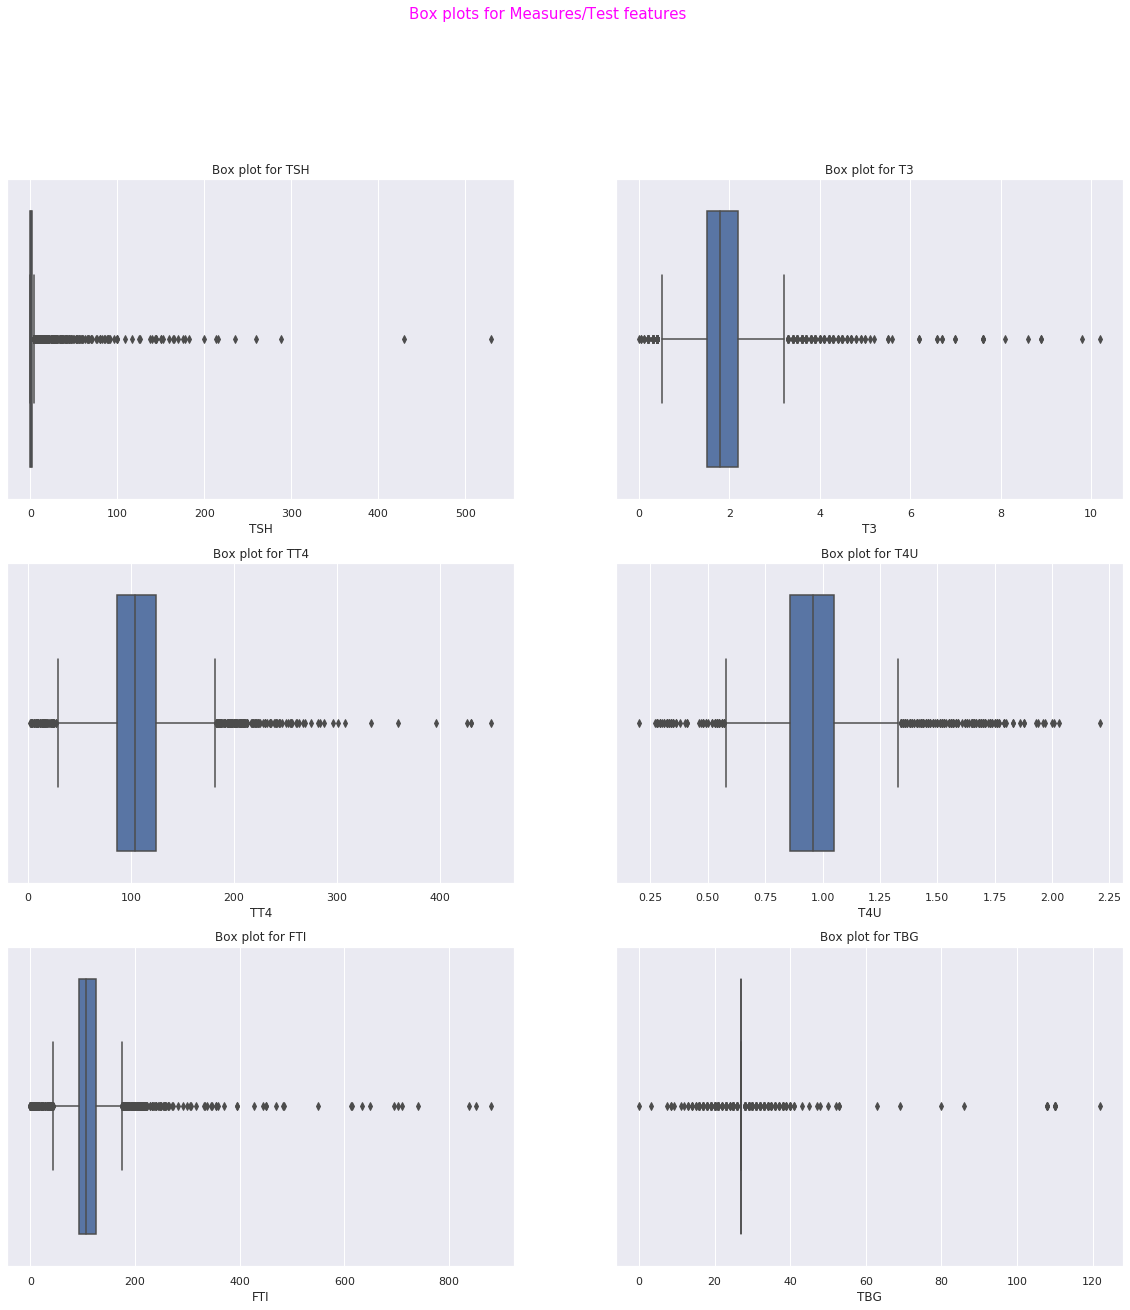

In [152]:
# We will use a boxplot to check for outliers
# we will use the list of measures/tests earlier created

# Specifying the chart we will use to plot the boxplots
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (20, 20))

# labeling the title
fig.suptitle('Box plots for Measures/Test features', y= 1, color = 'magenta', fontsize = 15)

sns.set(style = 'whitegrid', context = 'notebook')

# Using a for loop to iterate through the measured list and plot respective boxplots
for ax, data, name in zip(axes.flatten(), df, measured):
  sns.boxplot(df[name], ax = ax)
  ax.set_title('Box plot for '+ name)
  
plt.show()

All measured have plenty of outliers as shwon by the boxplots.

TT4, T4U and FTI have outliers on both sides of the boxplots (below Q1 and above Q4)

TSH, T3 and TBG have outliers on the right side i.e. above the Q4.

We will not remove outliers for now.

 Instead, we will create a model when they are present, observe the results,                                                                           then remove them accordingly.

# EDA and Feature Engineering

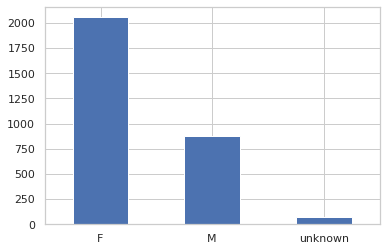

In [153]:
# previewing our data set's gender distribution
df.sex.value_counts().plot(kind = 'bar', rot = 0)

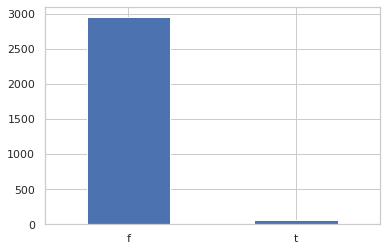

In [154]:
# distribution of pregnancy
df.pregnant.value_counts().plot(kind = 'bar', rot = 0)

negative       2879
hypothyroid     131
Name: status, dtype: int64


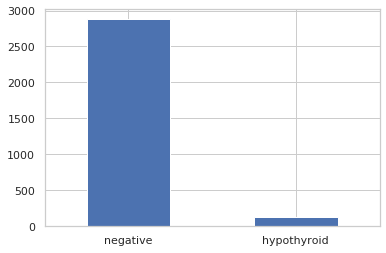

In [155]:
# distribution of hypothyroidism status
df.status.value_counts().plot(kind = 'bar', rot = 0)
print(df.status.value_counts())

It appears that most of the observations have reported 'negative'. Those without hypothyroidism outnumber those with it 2945 to 141 which makes this dataset very biased and also not appropriate enough to effectively and realistically answer the research question.

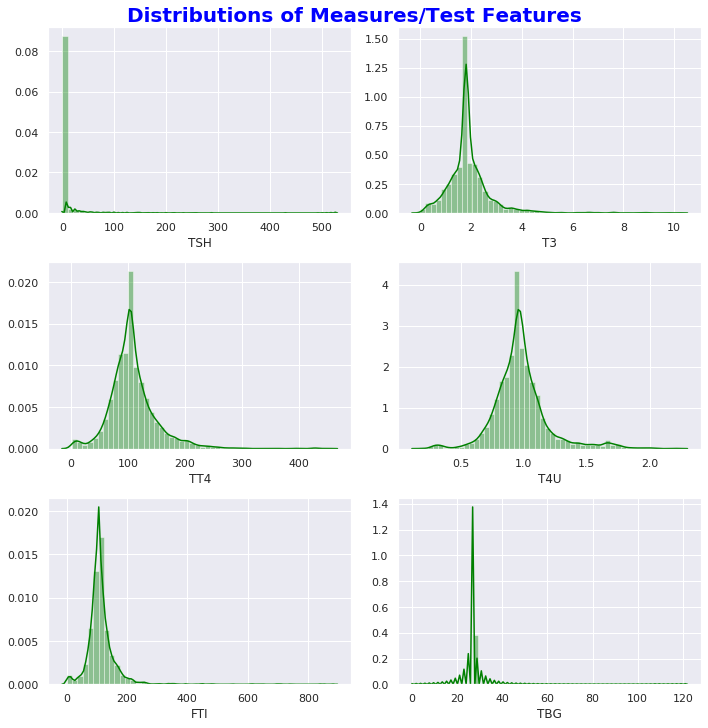

In [156]:
# Histograms of the numerical columns
# these are columns which represent measures or thyroid tests.
# First we create a list containing all the measures columns

measure_columns = ['TSH','T3','TT4','T4U','FTI','TBG']

sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows=3, ncols = 2, figsize = (10,10))
fig.suptitle('Distributions of Measures/Test Features', y= 1.01, color = 'blue', fontsize = 20, weight = 'bold')

for ax, data, name in zip(axes.flatten(), df, measure_columns):
  sns.distplot(df[name], ax = ax, kde = True, color = 'green')
plt.tight_layout()
plt.show()

The histograms show the distribution of various features.

Most distributions are near normal but filling the missing values with zero affects the first bin in nearly all the graphs.

Ideally, filling the missing values with mean seems like the best option so as to affect the data distributions.

For modeling purposes, the distributions will remain for now.

In [157]:
# get summary statistics
df.describe(include = 'all')

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3010,3010.000000,3010,3010,3010,3010,3010,3010,3010,3010,3010,3010,3010,3010,3010,3010.000000,3010,3010.000000,3010,3010.000000,3010,3010.000000,3010,3010.000000,3010,3010.000000
unique,2,NaN,3,2,2,2,2,2,2,2,2,2,2,2,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN,2,NaN
top,negative,NaN,F,f,f,f,f,f,f,f,f,f,f,f,y,NaN,y,NaN,y,NaN,y,NaN,y,NaN,n,NaN
freq,2879,NaN,2057,2579,2955,2968,2908,2781,2783,2951,2915,2970,3008,2917,2567,NaN,2344,NaN,2778,NaN,2779,NaN,2780,NaN,2767,NaN
mean,NaN,51.080886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.955405,NaN,1.899103,NaN,108.205615,NaN,0.975591,NaN,114.928870,NaN,27.311827
std,NaN,17.822409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.373177,NaN,0.849570,NaN,41.965952,NaN,0.216208,NaN,57.755302,NaN,5.654772
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,2.000000,NaN,0.200000,NaN,0.000000,NaN,0.000000
25%,NaN,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,1.500000,NaN,86.000000,NaN,0.860000,NaN,93.000000,NaN,27.000000
50%,NaN,51.154214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.700000,NaN,1.800000,NaN,104.000000,NaN,0.960000,NaN,107.000000,NaN,27.000000
75%,NaN,64.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.700000,NaN,2.200000,NaN,124.000000,NaN,1.050000,NaN,126.000000,NaN,27.000000


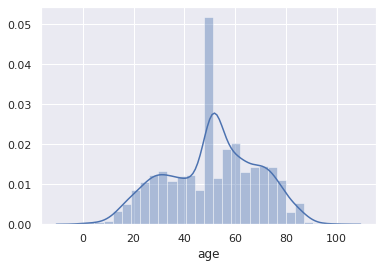

In [158]:
# distribution of the age column
sns.distplot(df.age)

From the Histogram, the distribution of age is close no a normal distribution.

It is also visible that most respondents were between age 55 and 60; the tallest bin.

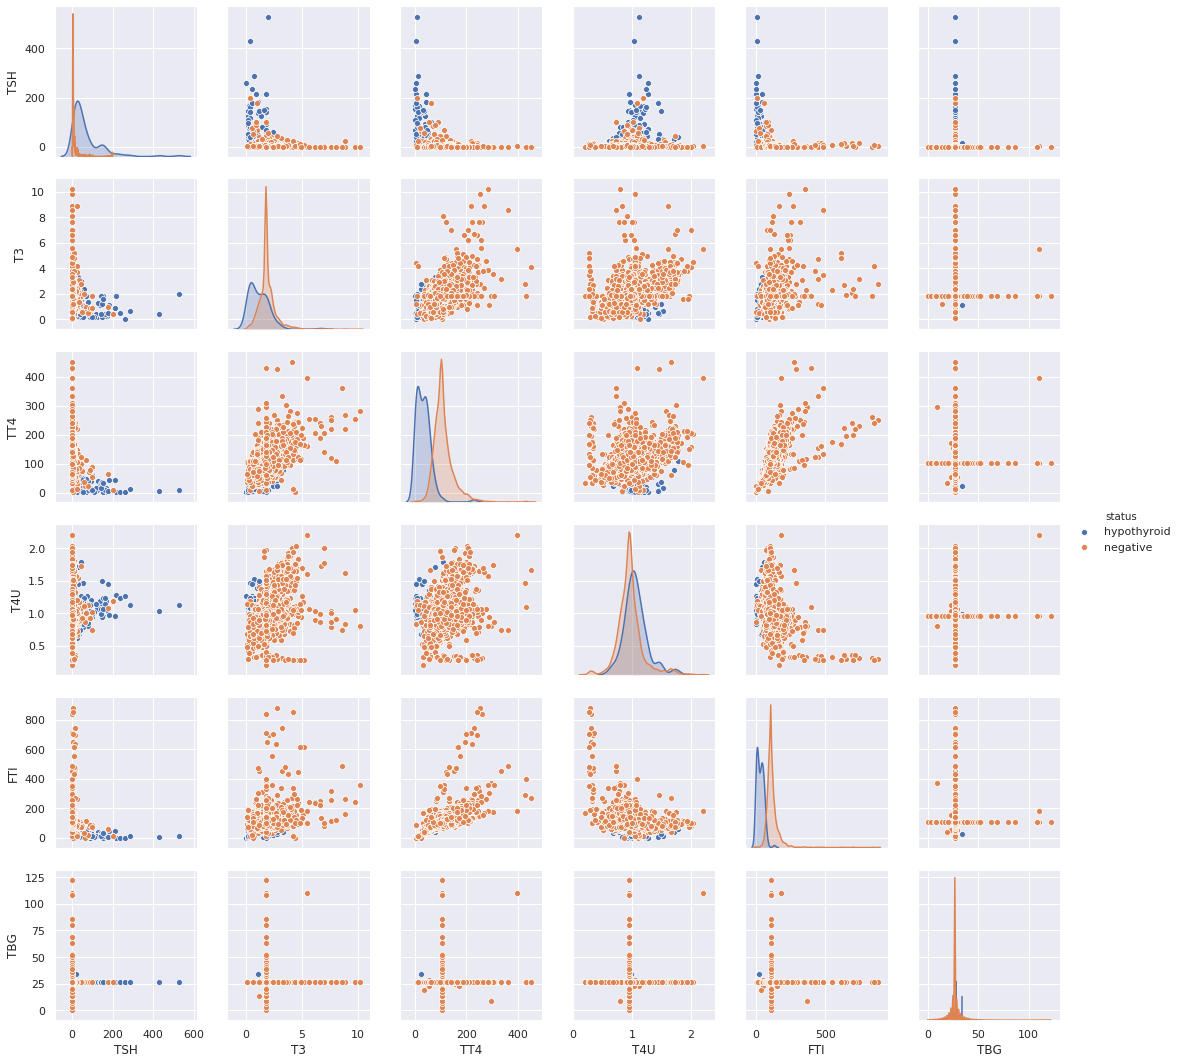

In [159]:
# A pairplot
# Here we want visualize scatter plots of features with the argument 'hue' 
# distinguishing when the condition (hpyothyroidism) is negative or postive

measured = ['TSH','T3','TT4','T4U','FTI','TBG']

sns.pairplot(df, kind="scatter", diag_kind="kde", vars=measured, hue="status")
plt.show()

In [160]:
# calculating age range
min = df.age.min()
max = df.age.max()
age_range = max - min
print("The youngest age is {}, the oldest age is {}.".format(min, max))
print("Therefore there's a range of {}".format(age_range))

The youngest age is 1.0, the oldest age is 98.0.
Therefore there's a range of 97.0


In [0]:
# splitting age into 9 age groups using the following ranges:
# 0-9, 10-18, 19-27, 28-36, 37-54, 55-63, 64-72, 73-81 and 82-99

conditions = [
    ((df.age >= 0) & (df.age <= 9)),
    ((df.age >= 10) & (df.age <= 18)),
    ((df.age >= 19) & (df.age <= 27)),
    ((df.age >= 28) & (df.age <= 36)),
    ((df.age >= 37) & (df.age <= 54)),
    ((df.age >= 55) & (df.age <= 63)),
    ((df.age >= 64) & (df.age <= 72)),
    ((df.age >= 73) & (df.age <= 81)),
    ((df.age >= 82) & (df.age <= 99))
]
choices = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']

df['age_range'] = np.select(conditions, choices)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd4b05a940>],
      dtype=object)

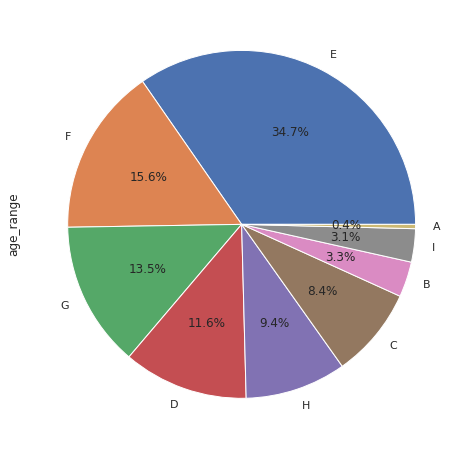

In [162]:
# plotting the age ranges in a pie chart
df.age_range.value_counts().plot(kind = 'pie', autopct = '%0.1f%%',
                                       figsize = [10, 8], subplots = True)

From the pie chart above we can see that our category E 

[Text(0, 0.5, 'Status'), Text(0.5, 1.0, 'Hypothyroidism per Age Range')]

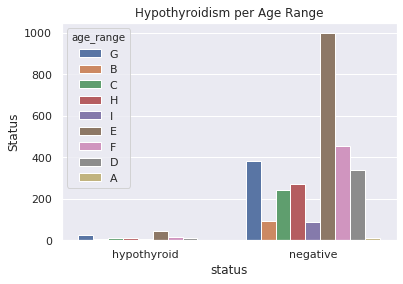

In [163]:
# previewing the distribution of hypothyroidism across the age ranges
df_age = sns.countplot('status', hue = 'age_range', data = df)
df_age.set(title = "Hypothyroidism per Age Range", ylabel = "Status")

In [164]:
# hypothyroidism per pregnancy status
df.groupby('status').pregnant.value_counts()

status       pregnant
hypothyroid  f            130
             t              1
negative     f           2821
             t             58
Name: pregnant, dtype: int64


Of the 61 pregnant women in our dataset, only 1 had hypothyroidism. Not only is this not generalizable, it is also too biased in determining whether pregnancy is a factor influencing hypothyroidism.

# Random Forest

In [165]:
# splitting our data into features & labels
X = df.drop(columns = ['status']).values
y = df.status.values

# getting our feature names
features = df.columns.to_list()
features.remove('status')

print(X.shape)
print(y.shape)

(3010, 26)
(3010,)


In [0]:
# 
X = df.drop('status', axis=1)
X = pd.get_dummies(X)
y = df.status.cat.codes
train_features = X

In [0]:
# splitting into training & test data
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
# importing the random forest regressor
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 200, min_samples_split = 20,
                              max_depth = 5)

# fitting our model to our training data
forest.fit(X_train, y_train)

# make predictions using our forest
y_pred = forest.predict(X_test)

In [169]:
# compare actual values with predicted values
compare = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})

# previewing our summary statistics
compare.describe()

,Actual,Predicted
count,602.000000,602.000000
mean,0.961794,0.975083
std,0.191853,0.156002
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


Our model seems to have done a good job at making the predictions as seen by how close the summary statistics of the predicted values are to the those of the actual values. Let us properly and accurately assess the accuracy of the model using the sklearn metrics.

In [170]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.013289036544850499
Mean Squared Error: 0.013289036544850499
Root Mean Squared Error: 0.115278083540847


In [171]:
from sklearn.metrics import f1_score,r2_score
print("R2 score : %.2f" % r2_score(y_test,y_pred))
print('accuracy_score:',accuracy_score (y_test , y_pred))

#computing the F1 score since the data is unbalanced
print('F1_score, average = micro:',f1_score(y_test, y_pred, average='micro'))
print('F1_score, average = macro:',f1_score(y_test, y_pred, average='macro'))
print('F1_score, average = weighted:',f1_score(y_test, y_pred, average='weighted'))

R2 score : 0.64
accuracy_score: 0.9867109634551495
F1_score, average = micro: 0.9867109634551495
F1_score, average = macro: 0.8913063103728447
F1_score, average = weighted: 0.9853577059646204


Our MSE and RMSE values are very small meaning our model has done a really good job.

0.9867109634551495  
The model is 98% accurate.

This model is too good. It could be overfitting.

We now want to see what tree number 23 looks like.

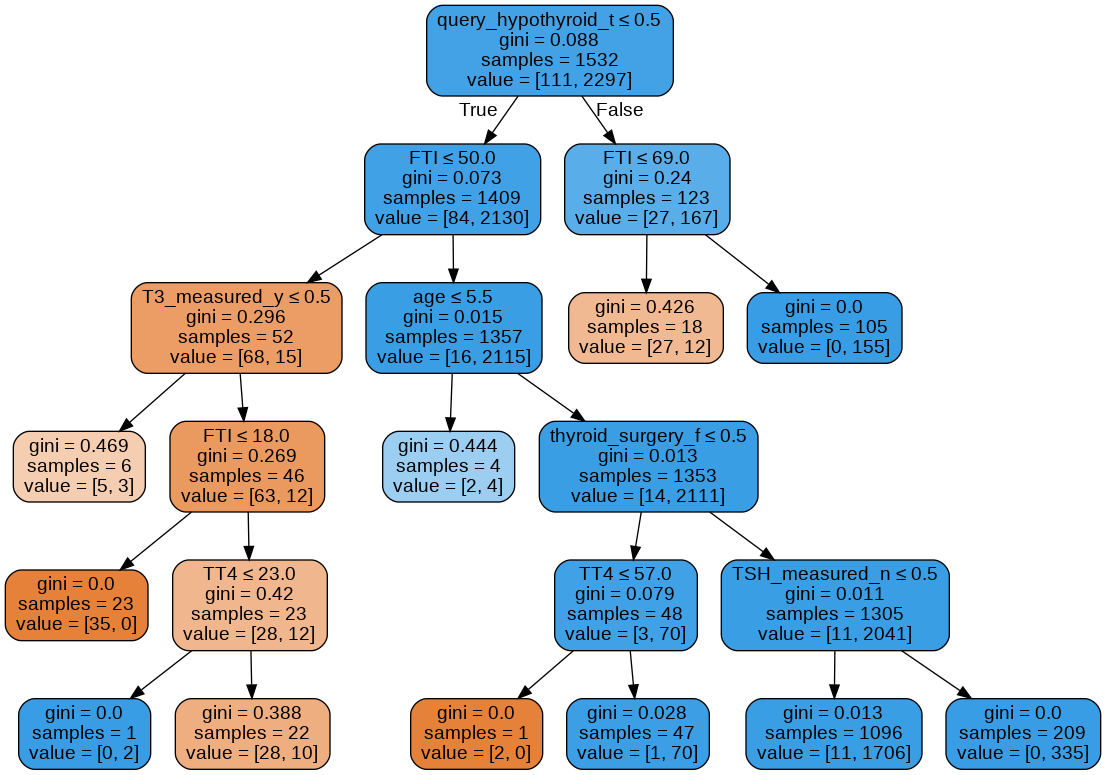

In [172]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

y_pred = forest.predict(X_test)
dot_data = StringIO()

# picks a specific tree from the forest
tree = forest.estimators_[22]

export_graphviz(tree, out_file = dot_data, filled = True, rounded = True,
                special_characters = True, feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid.png')
Image(graph.create_png())

In [173]:
# to get the importance levels of our features
importances = list(tree.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance 
                       in zip(features, importances)]

# sort in descending order
feature_importances = sorted(feature_importances, key = lambda x: x[1], 
                             reverse = True)
feature_importances

[('thyroid_surgery', 0.92),
 ('query_on_thyroxine', 0.04),
 ('T4U_measured', 0.02),
 ('age', 0.01),
 ('sex', 0.0),
 ('on_thyroxine', 0.0),
 ('on_antithyroid_medication', 0.0),
 ('query_hypothyroid', 0.0),
 ('query_hyperthyroid', 0.0),
 ('pregnant', 0.0),
 ('sick', 0.0),
 ('tumor', 0.0),
 ('lithium', 0.0),
 ('goitre', 0.0),
 ('TSH_measured', 0.0),
 ('TSH', 0.0),
 ('T3_measured', 0.0),
 ('T3', 0.0),
 ('TT4_measured', 0.0),
 ('TT4', 0.0),
 ('T4U', 0.0),
 ('FTI_measured', 0.0),
 ('FTI', 0.0),
 ('TBG_measured', 0.0),
 ('TBG', 0.0),
 ('age_range', 0.0)]

## AdaBoost

AdaBoost, short for Adaptive Boosting.

AdaBoost rarely suffers from overfitting problems in low noise data cases.

However, recent studies with highly noisy patterns have clearly shown that overfitting can occur.

Ada-boost, like Random Forest Classifier is another ensemble classifier.

(Ensemble classifier are made up of multiple classifier algorithms and whose output is combined result of output of those classifier algorithms).

-Parameters to tune
- Parameters of one initial tree
- Number of trees to create

In [174]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth = 5)

# training our model on our training data
decision_tree = decision_tree.fit(X_train, y_train)

# making predictions on the test data
decision_y_pred = decision_tree.predict(X_test)

# comparing actual values to predicted values
decision_compare = pd.DataFrame({'Actual' : y_test ,'Predicted' : decision_y_pred})

# previewing our summary statistics
decision_compare.describe()

,Actual,Predicted
count,602.000000,602.000000
mean,0.961794,0.961794
std,0.191853,0.191853
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [175]:
from sklearn.ensemble import AdaBoostClassifier

# creating our classifier with 200 trees of depth 1
ada_reg = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 1), 
                            n_estimators = 200)

# fitting our model to our training data
ada_reg.fit(X_train, y_train)

# making predictions
ada_reg_y_pred = ada_reg.predict(X_test)

# comparing actual values to predicted values
ada_reg_compare = pd.DataFrame({'Actual' : y_test , 'Predicted' : ada_reg_y_pred})

# previewing our summary statistics
ada_reg_compare.describe()

,Actual,Predicted
count,602.000000,602.000000
mean,0.961794,0.963455
std,0.191853,0.187798
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [176]:
# evaluating accuracy
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ada_reg_y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ada_reg_y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ada_reg_y_pred)))

Mean Absolute Error: 0.008305647840531562
Mean Squared Error: 0.008305647840531562
Root Mean Squared Error: 0.09113532707206115


In [177]:
from sklearn.metrics import f1_score,r2_score
print("R2 score : %.2f" % r2_score(y_test,ada_reg_y_pred))
print('accuracy_score:',accuracy_score (y_test , ada_reg_y_pred))

#computing the F1 score since the data is unbalanced
print('F1_score, average = micro:',f1_score(y_test, ada_reg_y_pred, average='micro'))
print('F1_score, average = macro:',f1_score(y_test, ada_reg_y_pred, average='macro'))
print('F1_score, average = weighted:',f1_score(y_test, ada_reg_y_pred, average='weighted'))

R2 score : 0.77
accuracy_score: 0.9916943521594684
F1_score, average = micro: 0.9916943521594684
F1_score, average = macro: 0.942287412520372
F1_score, average = weighted: 0.991605650292971


The model yielded 99.1% accuracy slightly higher than Random Forest Classifier model. But still this might be overfitting.

## Gradient Boosting

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

Gradient boosting is a greedy algorithm and can overfit a training dataset quickly.

It can benefit from regularization methods that penalize various parts of the algorithm and generally improve the performance of the algorithm by reducing overfitting.

Parameters to tune;

- Maximum depth
- Minimum sample splits
- Node creation factor
- Learning rate
- Number of trees to create

In [178]:
from sklearn.ensemble import GradientBoostingClassifier

# setting different learning rates, so that we can compare the performance of 
# the classifier's performance at different learning rates
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    grad = GradientBoostingClassifier(n_estimators = 200, max_depth = 2,
                                     learning_rate = learning_rate,
                                     random_state = 0)
    grad.fit(X_train, y_train)

    print("Learning rate:", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(grad.score(X_train,y_train)))                                                               
    print("Accuracy score (validation): {0:.3f}".format(grad.score(X_test,y_test)))                                                                

Learning rate: 0.05
Accuracy score (training): 0.997
Accuracy score (validation): 0.992
Learning rate: 0.075
Accuracy score (training): 0.998
Accuracy score (validation): 0.992
Learning rate: 0.1
Accuracy score (training): 0.999
Accuracy score (validation): 0.988
Learning rate: 0.25
Accuracy score (training): 1.000
Accuracy score (validation): 0.988
Learning rate: 0.5
Accuracy score (training): 1.000
Accuracy score (validation): 0.988
Learning rate: 0.75
Accuracy score (training): 0.968
Accuracy score (validation): 0.968
Learning rate: 1
Accuracy score (training): 0.966
Accuracy score (validation): 0.975


We can see that a learning rate of 0.1 gives us the best performance when it comes to validating, and good performance when it comes to training so we will use it as our parameter.

In [179]:
# now to use our selected learning rate to model
grad2 = GradientBoostingClassifier(n_estimators = 200, max_depth = 2, 
                                  learning_rate = 0.1, random_state = 0)

# fitting to training data
grad2.fit(X_train, y_train)

# making predictions
grad2_y_pred = grad2.predict(X_test)

# comparing actual values to predicted values
grad2_compare = pd.DataFrame({'Actual' : y_test,'Predicted' : grad2_y_pred})
                        
# previewing our summary statistics
grad2_compare.describe()

,Actual,Predicted
count,602.000000,602.000000
mean,0.961794,0.966777
std,0.191853,0.179366
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


Our model seems to have performed so well there is some level of overfitting. We will now assess its metrics.

In [180]:
# evaluating accuracy
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, grad2_y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, grad2_y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, grad2_y_pred)))

Mean Absolute Error: 0.011627906976744186
Mean Squared Error: 0.011627906976744186
Root Mean Squared Error: 0.10783277320343841


Our RMSE is low, indicating that our random forest model is performing really well.

In [181]:
from sklearn.metrics import f1_score,r2_score
print("R2 score : %.2f" % r2_score(y_test,grad2_y_pred))
print('accuracy_score:',accuracy_score (y_test , grad2_y_pred))

#computing the F1 score since the data is unbalanced
print('F1_score, average = micro:',f1_score(y_test, grad2_y_pred, average='micro'))
print('F1_score, average = macro:',f1_score(y_test, grad2_y_pred, average='macro'))
print('F1_score, average = weighted:',f1_score(y_test, grad2_y_pred, average='weighted'))

R2 score : 0.68
accuracy_score: 0.9883720930232558
F1_score, average = micro: 0.9883720930232558
F1_score, average = macro: 0.9155900086132644
F1_score, average = weighted: 0.9879814914969053


# Support Vector Machine

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane.

In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples.

--- Parameters to tune:

      * Kernel
      * C
      * Gamma
Creating SVC using different kernels

## Linear Kernel

In [182]:
# applying Principal Component Analysis to reduce the number of variables
from sklearn.decomposition import PCA
pca = PCA(n_components = 3).fit(X)
X = pca.transform(X)
X.shape

(3010, 3)

In [0]:
# splitting into training & testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [184]:
# importing our SVM model and setting kernel to linear

from sklearn.svm import SVC
linear = SVC(kernel = 'linear')

# fitting to training data
linear.fit(X_train, y_train)

# making predictions
lin_y_pred = linear.predict(X_test)

# assessing the model
from sklearn.metrics import confusion_matrix, accuracy_score

print("Linear kernel score:", accuracy_score(y_test, lin_y_pred))
print("Linear kernel confusion matrix:\n", confusion_matrix(y_test, lin_y_pred))

Linear kernel score: 0.9867109634551495
Linear kernel confusion matrix:
 [[ 16   7]
 [  1 578]]


In [0]:
svc_model = SVC(kernel= 'linear',gamma='scale',C=1.0)

In [186]:
svc_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_predict = svc_model.predict(X_test)

In [188]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.94      0.70      0.80        23
           1       0.99      1.00      0.99       579

    accuracy                           0.99       602
   macro avg       0.96      0.85      0.90       602
weighted avg       0.99      0.99      0.99       602



The average precision is 0.99

The SVC model using linear kernel yielded 98% accuracy.

## Polynomial Kernel

In [0]:
svc_model = SVC(kernel= 'poly',gamma='scale',C=1.0)

In [190]:
svc_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_predict = svc_model.predict(X_test)

In [192]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.94      0.65      0.77        23
           1       0.99      1.00      0.99       579

    accuracy                           0.99       602
   macro avg       0.96      0.83      0.88       602
weighted avg       0.98      0.99      0.98       602



In [193]:
# trying it out with a polynomial kernel
poly = SVC(kernel = 'poly', gamma = 'auto')

# training the model
poly.fit(X_train, y_train)

# making prediction
poly_y_pred = poly.predict(X_test)

# assessing the model
print("Polynomial kernel score:", accuracy_score(y_test, poly_y_pred))
print("Polynomial kernel confusion matrix:\n", confusion_matrix(y_test, poly_y_pred))

Polynomial kernel score: 0.9933554817275747
Polynomial kernel confusion matrix:
 [[ 21   2]
 [  2 577]]


Polynomial Kernel has an accuracy of 99%

## Radial Basis Function (RBF) Kernel

In [0]:
svc_model = SVC(kernel= 'rbf',gamma='scale',C=1.0)

In [195]:
svc_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_predict = svc_model.predict(X_test)

In [197]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.95      0.83      0.88        23
           1       0.99      1.00      1.00       579

    accuracy                           0.99       602
   macro avg       0.97      0.91      0.94       602
weighted avg       0.99      0.99      0.99       602



In [198]:
# now doing it with rbf kernel
rbf = SVC(kernel = 'rbf', gamma = 'auto')

# training the model
rbf.fit(X_train, y_train)

# making prediction
rbf_y_pred = rbf.predict(X_test)

# assessing the model
print("RBF kernel score:", accuracy_score(y_test, rbf_y_pred))
print("RBF kernel confusion matrix:\n", confusion_matrix(y_test, rbf_y_pred))

RBF kernel score: 0.9601328903654485
RBF kernel confusion matrix:
 [[  0  23]
 [  1 578]]


RBF Kernel has an accuracy of 96% which seems to be the lowest accuracy among the three SVM kernels.

As we can see, the polynomial kernel is the best performing while the rbf kernel, although still quite good, is the worst performing of the 3 SVM kernels used.

## SVM Tuning

In [199]:
# We already know that the linear polynomial perform best for this partical classification problem.

# Here we will use Randomized search to find the best parameters for the model

# Creating a dictionary
# Specifying the parameters we want to tune

params = {'C': [0.001, 0.01, 0.1, 1, 10],
          'gamma': [0.001, 0.01, 0.1, 1]}

svc = SVC()

search = RandomizedSearchCV(estimator = svc, 
                      param_distributions = params, 
                      scoring = 'accuracy',
                      n_jobs = 1, 
                      cv = 10 )
                
                
search.fit(X,y)
search.best_params_

{'C': 0.1, 'gamma': 0.001}


The output shows the best parameters which are C: 0.1 and Gamma : 0.001.

We wil fit them in the model using linear kernel and observe changes.



In [200]:
svc = SVC(kernel = 'poly', C = 0.1, gamma = 0.001)

svc = svc.fit(X_train, y_train)

# Fitting the model, making predictions and evaluating the model
y_pred = svc.predict(X_test)

accuracy_score(y_test, y_pred)

0.9867109634551495

# Challenging the Solution

## Fitting SVC model with Sigmoid Function

In [201]:
# Fitting the model, making predictions and evaluating the model

svc = SVC(kernel = 'sigmoid', C = 0.1, gamma = 0.001)

svc = svc.fit(X_train, y_train)


y_pred = svc.predict(X_test)

accuracy_score(y_test, y_pred)

0.9368770764119602

Using Sigmoid the model yielded 93.6% accuracy.

This is a little bit lower compared to the linear kernel using the same two features.

## Fitting XGBoost model

In [202]:
import xgboost as xgb
xg = xgb.XGBClassifier() 

xg.fit(X_train, y_train)

# Fitting the model, making predictions and evaluating the model

y_pred = svc.predict(X_test)

accuracy_score(y_test, y_pred)

0.9368770764119602

The XG Boost model yielded 93.6% accuracy just like the sigmoid kernel in SVC model.

This is lower compared to the linear kernel using the same two features.

# Conclusion

Overall the best model was Support Vector Classifier using the polynomial kernel at 99% accuracy.

For the Ensemble methods: Gradient Boosting and Ada Boost Classifier models performed best with 99.1% accuracy.

There were several instances of overfitting.

This may have been caused by inadequate data to train the models.

Several regularization techniques were applied for example the C parameter in the Support Vector Classifier.